In [86]:
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [87]:
customers = pd.read_csv('Mall_Customers.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [88]:
# Assiging binary numbers to male and female
customers['Gender'] = [0 if gender == 'Male' else 1 for gender in customers['Gender']]
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [89]:
# Check for null values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [90]:
# Displaying summary statistics from the table
customers.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


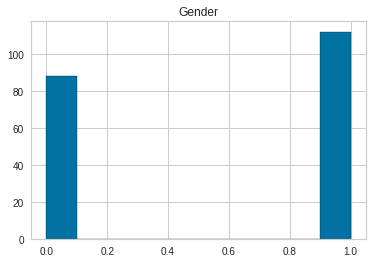

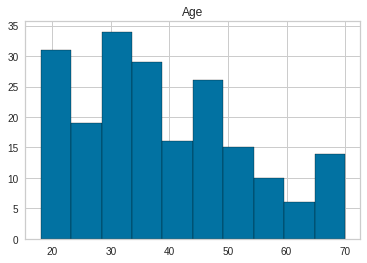

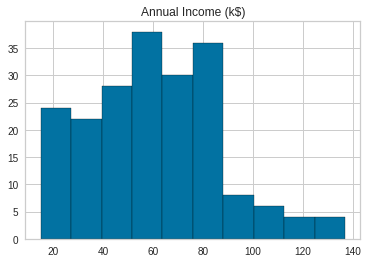

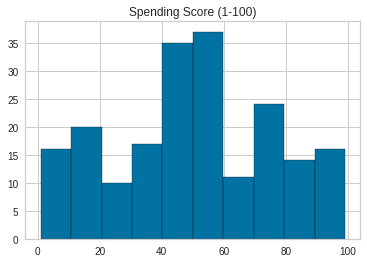

In [91]:
customers.hist('Gender')
customers.hist('Age')
customers.hist('Annual Income (k$)')
customers.hist('Spending Score (1-100)');

Based on the Spending Score histogram, a large proportion of customers have spending scores between 40 and 60

In [92]:
# Removing CustomerID as a feature from the matrix
X = customers.iloc[:, 1:] 
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


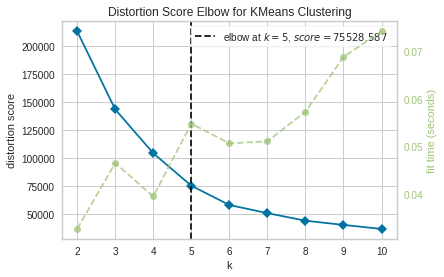

In [93]:
# Plotting distortion score (mean squared distance of points from its centroid) over different number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show();

k = 5 looks to be the optimal number of clusters based on the elbow method

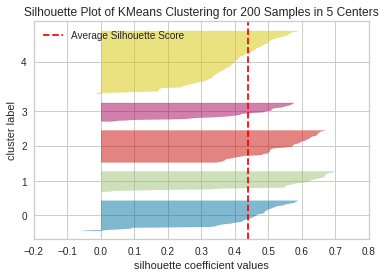

In [94]:
# Visualizing how close points are to the cluster they are assigned (Silhouette Score)
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(KMeans(5), colors='yellowbrick')
visualizer.fit(X)        
visualizer.show();

There are a couple of points with a negative sillhouette score meaning that they seem to be closer points in another cluster than to its own cluster

In [95]:
# Initializing K-means model to 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [96]:
# Adding the cluster number into table based on K-means prediction
X['Category'] = y_kmeans
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),Category
0,0,19,15,39,1
1,0,21,15,81,4
2,1,20,16,6,1
3,1,23,16,77,4
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,2
198,0,32,137,18,0


In [97]:
# Computing the centroids of the each cluster
kmeans.cluster_centers_

array([[ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.58227848, 43.08860759, 55.29113924, 49.56962025],
       [ 0.60869565, 25.52173913, 26.30434783, 78.56521739]])

In [98]:
# Creating function to choose colors based on the cluster
def pick_color(categories):
    colors = []
    for category in categories:
        if category == 0:
            colors.append('blue')
        elif category == 1:
            colors.append('red')
        elif category == 2:
            colors.append('green')
        elif category == 3:
            colors.append('yellow')
        elif category == 4:
            colors.append('purple')
        elif category == 5:
            colors.append('gray')
        elif category == 6:
            colors.append('pink')
        elif category == 7:
            colors.append('black')
        elif category == 8:
            colors.append('lightblue')
        elif category == 9:
            colors.append('orange')
    return colors
            
colors = pick_color(X['Category'])

Text(0.5, 0, 'Annual Income (k$)')

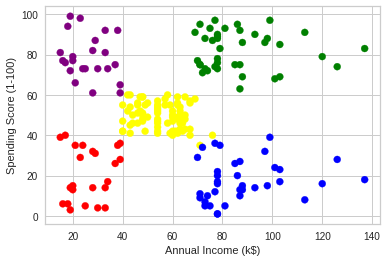

In [99]:
# Visualizing the different clusters based on Spending Score vs Annual Income
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=colors)
plt.ylabel("Spending Score (1-100)")
plt.xlabel('Annual Income (k$)')

Five Clusters:
 - Cluster in purple consists of customers who have low annual income but spend a lot
 - Cluster in green consists of customers who have low annual income and spend little
 - Cluster in blue consists of customers who have an average annual income and spend an average amount
 - Cluster in yellow consists of customers who have high annual income and spend a lot
 - Cluster in red consists of customers who have high annual income but spend little

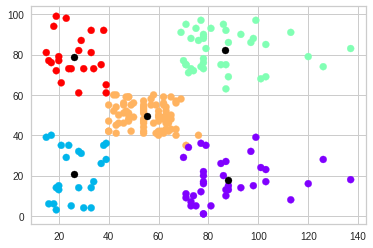

In [100]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,2] ,kmeans.cluster_centers_[:,3], color='black')

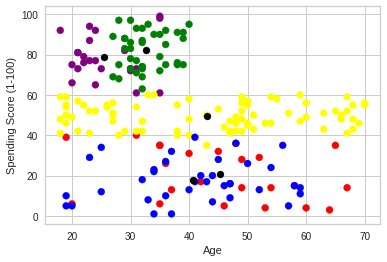

In [101]:
# Visualizing clusters based on Spending Score vs Age
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=colors)
plt.ylabel("Spending Score (1-100)")
plt.xlabel('Age')
plt.scatter(kmeans.cluster_centers_[:,1] ,kmeans.cluster_centers_[:,3], color='black')

Clusters do not seem to be easily identified when plotting Spending Score vs Age. Indicates that age did not affect how clusters were assigned.